In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, roc_auc_score,confusion_matrix
import shap
import numpy as np
from sklearn.metrics import f1_score



In [ ]:
CSV_file= pd.read_csv('/content/train.csv')
print(CSV_file.info())
print(CSV_file.describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4225 non-null   int64  
 1   Avg Monthly GB Download            4225 non-null   int64  
 2   Avg Monthly Long Distance Charges  4225 non-null   float64
 3   Churn Category                     1121 non-null   object 
 4   Churn Reason                       1121 non-null   object 
 5   Churn Score                        4225 non-null   int64  
 6   City                               4225 non-null   object 
 7   CLTV                               4225 non-null   int64  
 8   Contract                           4225 non-null   object 
 9   Country                            4225 non-null   object 
 10  Customer ID                        4225 non-null   object 
 11  Customer Status                    4225 non-null   objec

In [ ]:
print(CSV_file.head(10))

   Age  Avg Monthly GB Download  Avg Monthly Long Distance Charges  \
0   72                        4                              19.44   
1   27                       59                              45.62   
2   59                        0                              16.07   
3   25                       27                               0.00   
4   31                       21                              17.22   
5   32                       30                              11.94   
6   36                        8                              10.23   
7   48                       16                               8.98   
8   72                       14                              44.81   
9   54                       12                              14.88   

    Churn Category                   Churn Reason  Churn Score           City  \
0              NaN                            NaN           51      San Mateo   
1              NaN                            NaN           27   Su

In [ ]:
CSV_file.isnull().sum()

,0
Age,0
Avg Monthly GB Download,0
Avg Monthly Long Distance Charges,0
Churn Category,3104
Churn Reason,3104
Churn Score,0
City,0
CLTV,0
Contract,0
Country,0


In [ ]:
CSV_file.drop(columns=['Churn Category','Churn Reason','Churn Score'],inplace= True)
drop_cols = ['Customer ID', 'City', 'Country', 'Lat Long', 'State', 'Zip Code','CLTV','Customer Status']
CSV_file = CSV_file.drop(columns=drop_cols)

In [ ]:
CSV_file['Internet Type'].fillna('No Internet', inplace= True)
CSV_file['Offer'].fillna('No Offer', inplace= True)

/tmp/ipython-input-2817607384.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  CSV_file['Internet Type'].fillna('No Internet', inplace= True)
/tmp/ipython-input-2817607384.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
CSV_file.isnull().sum()

,0
Age,0
Avg Monthly GB Download,0
Avg Monthly Long Distance Charges,0
Contract,0
Dependents,0
Device Protection Plan,0
Gender,0
Internet Service,0
Internet Type,0
Latitude,0


In [ ]:
num_column= CSV_file.select_dtypes(include=['int64','float64'])
col_column= CSV_file.select_dtypes(include=['object'])


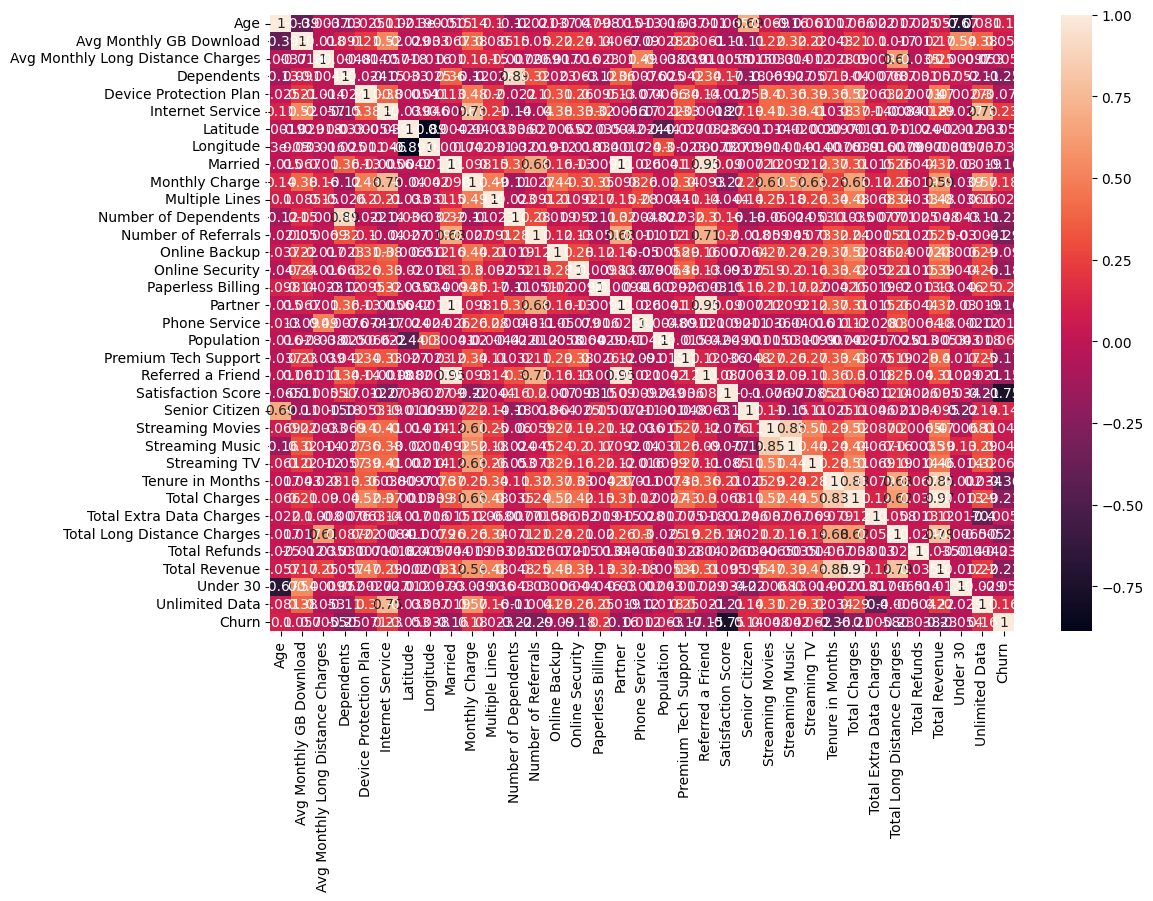

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(num_column.corr(), annot=True)
plt.show()

In [ ]:
binary_cols = [c for c in num_column if CSV_file[c].nunique() == 2 and c != 'Churn']
cont_cols   = [c for c in num_column if CSV_file[c].nunique() > 2 and c != 'Churn']


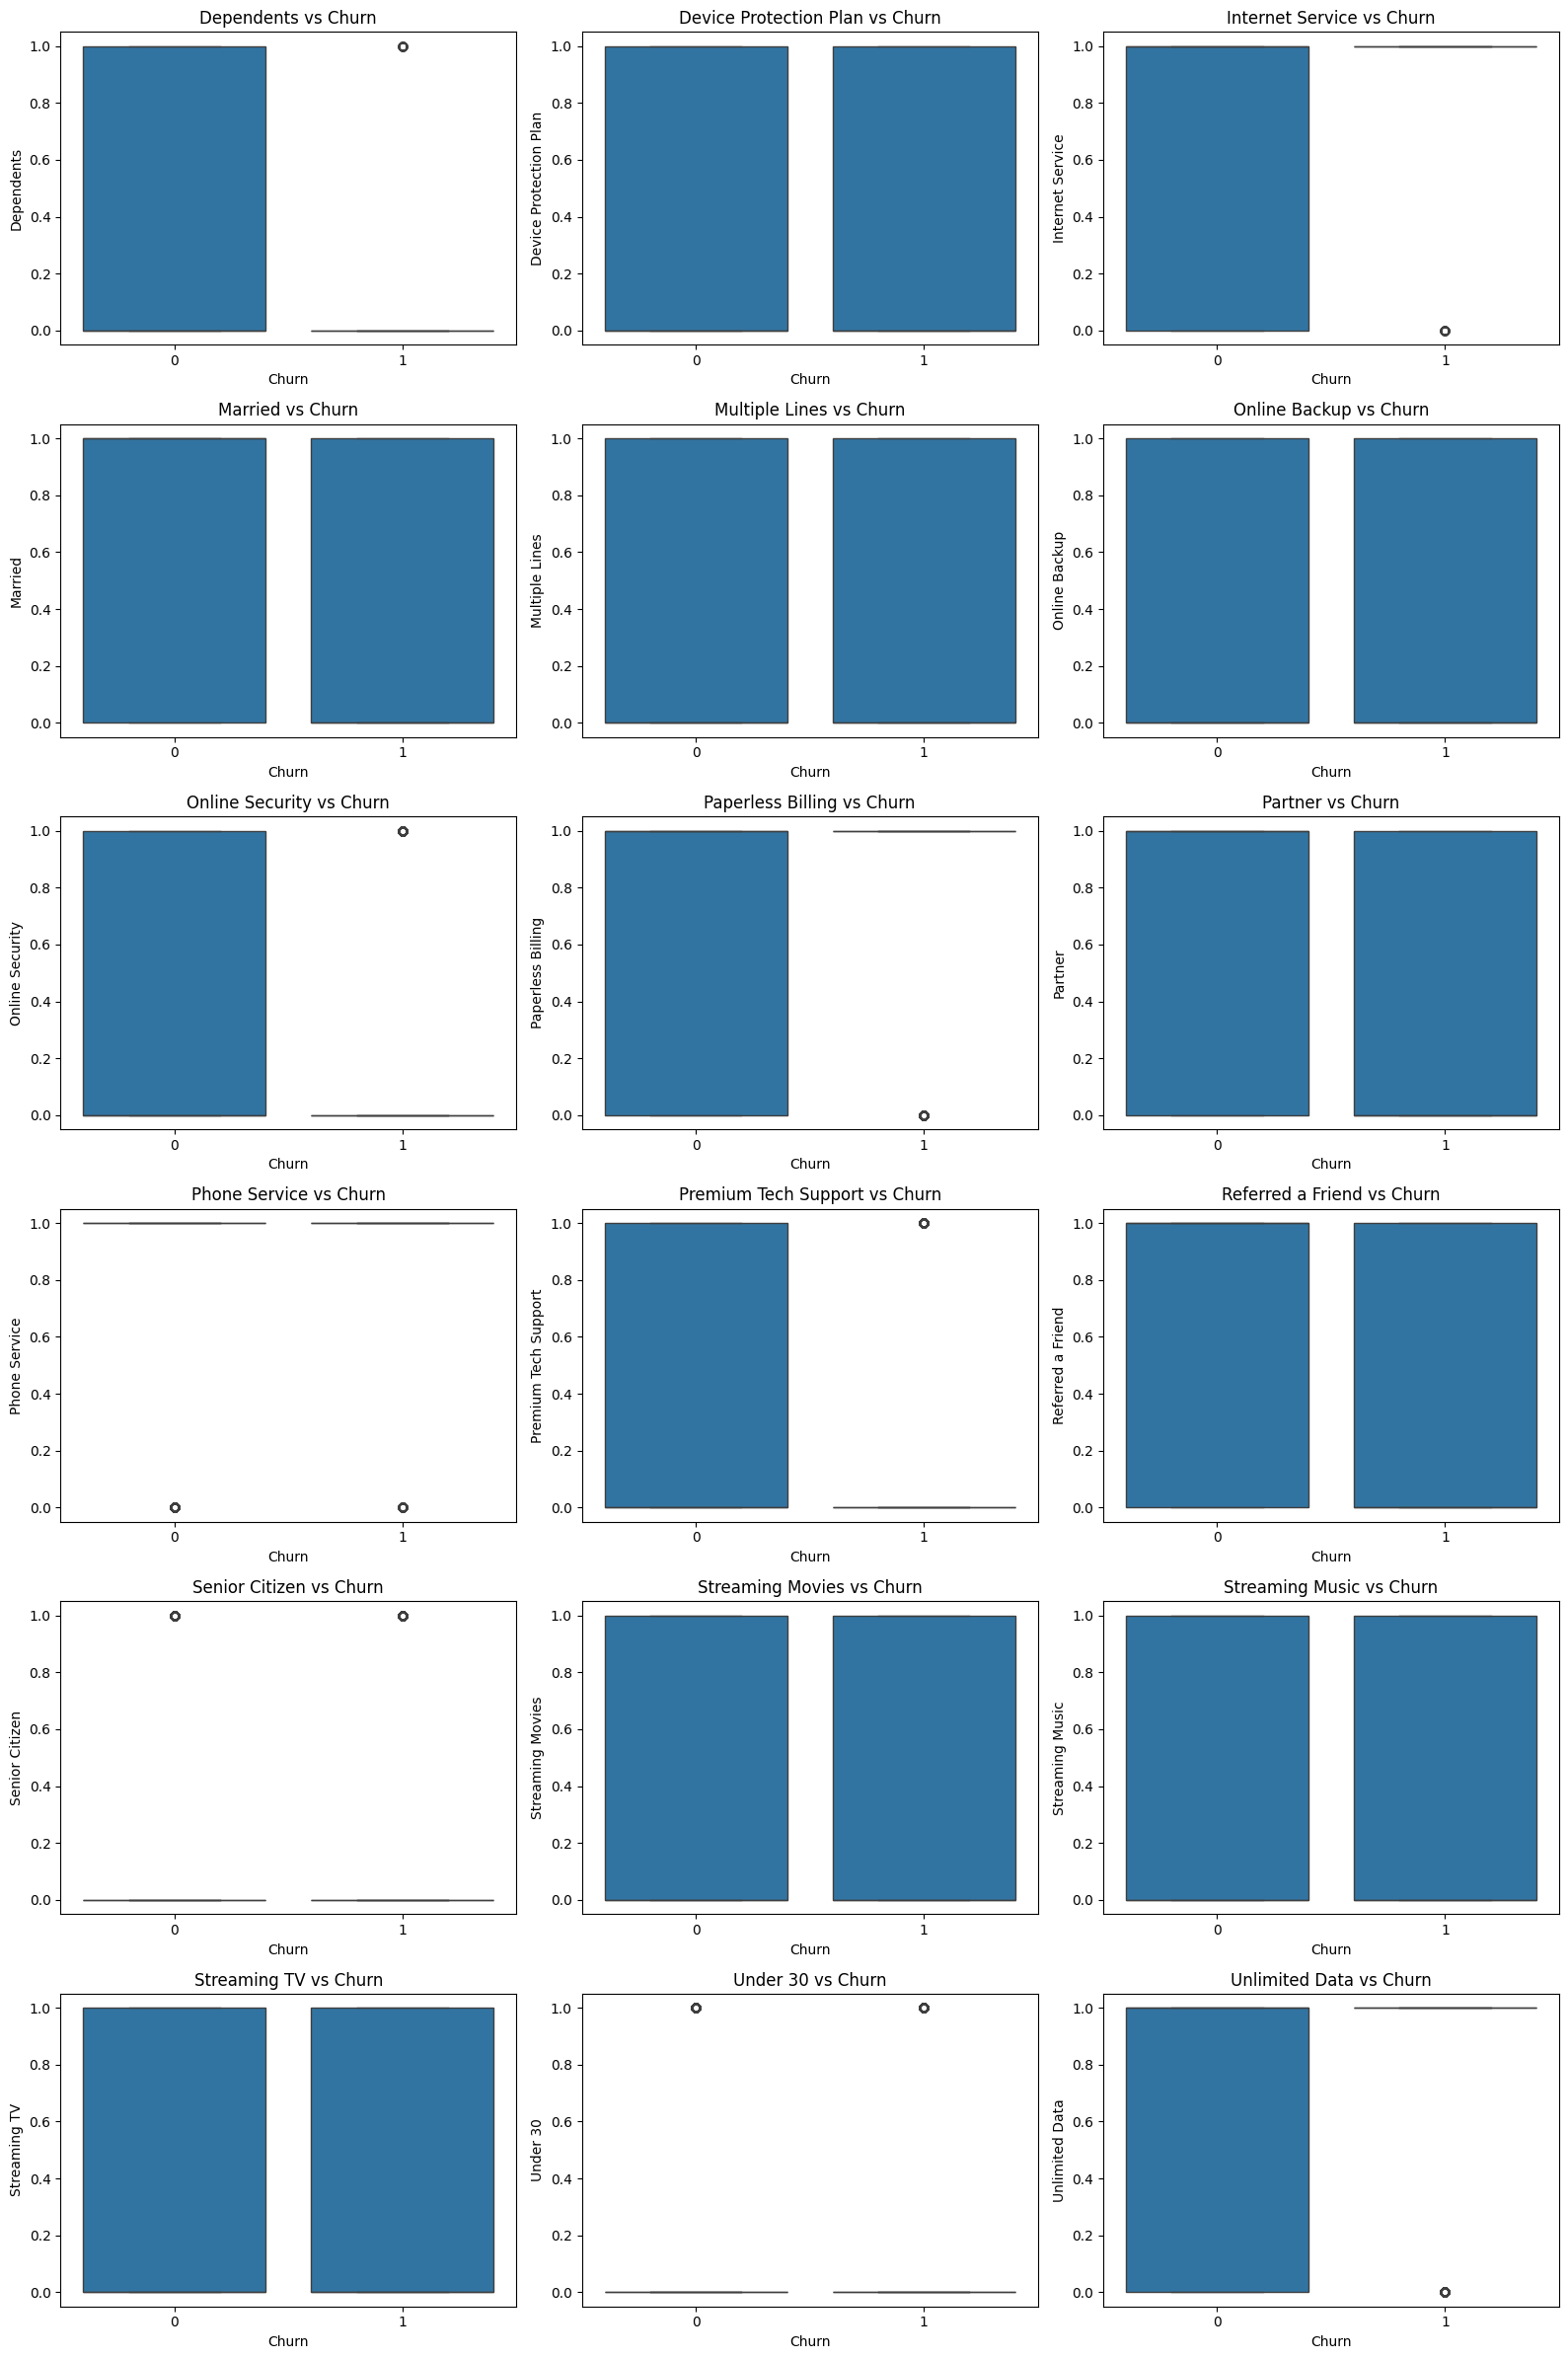

In [ ]:
n = len(binary_cols)
cols = 3
rows = math.ceil(n / cols)
plt.figure(figsize=(16, rows * 4))

for i, col in enumerate(binary_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x='Churn', y=col, data=CSV_file)
    plt.title(f"{col} vs Churn")
    plt.tight_layout()

plt.show()

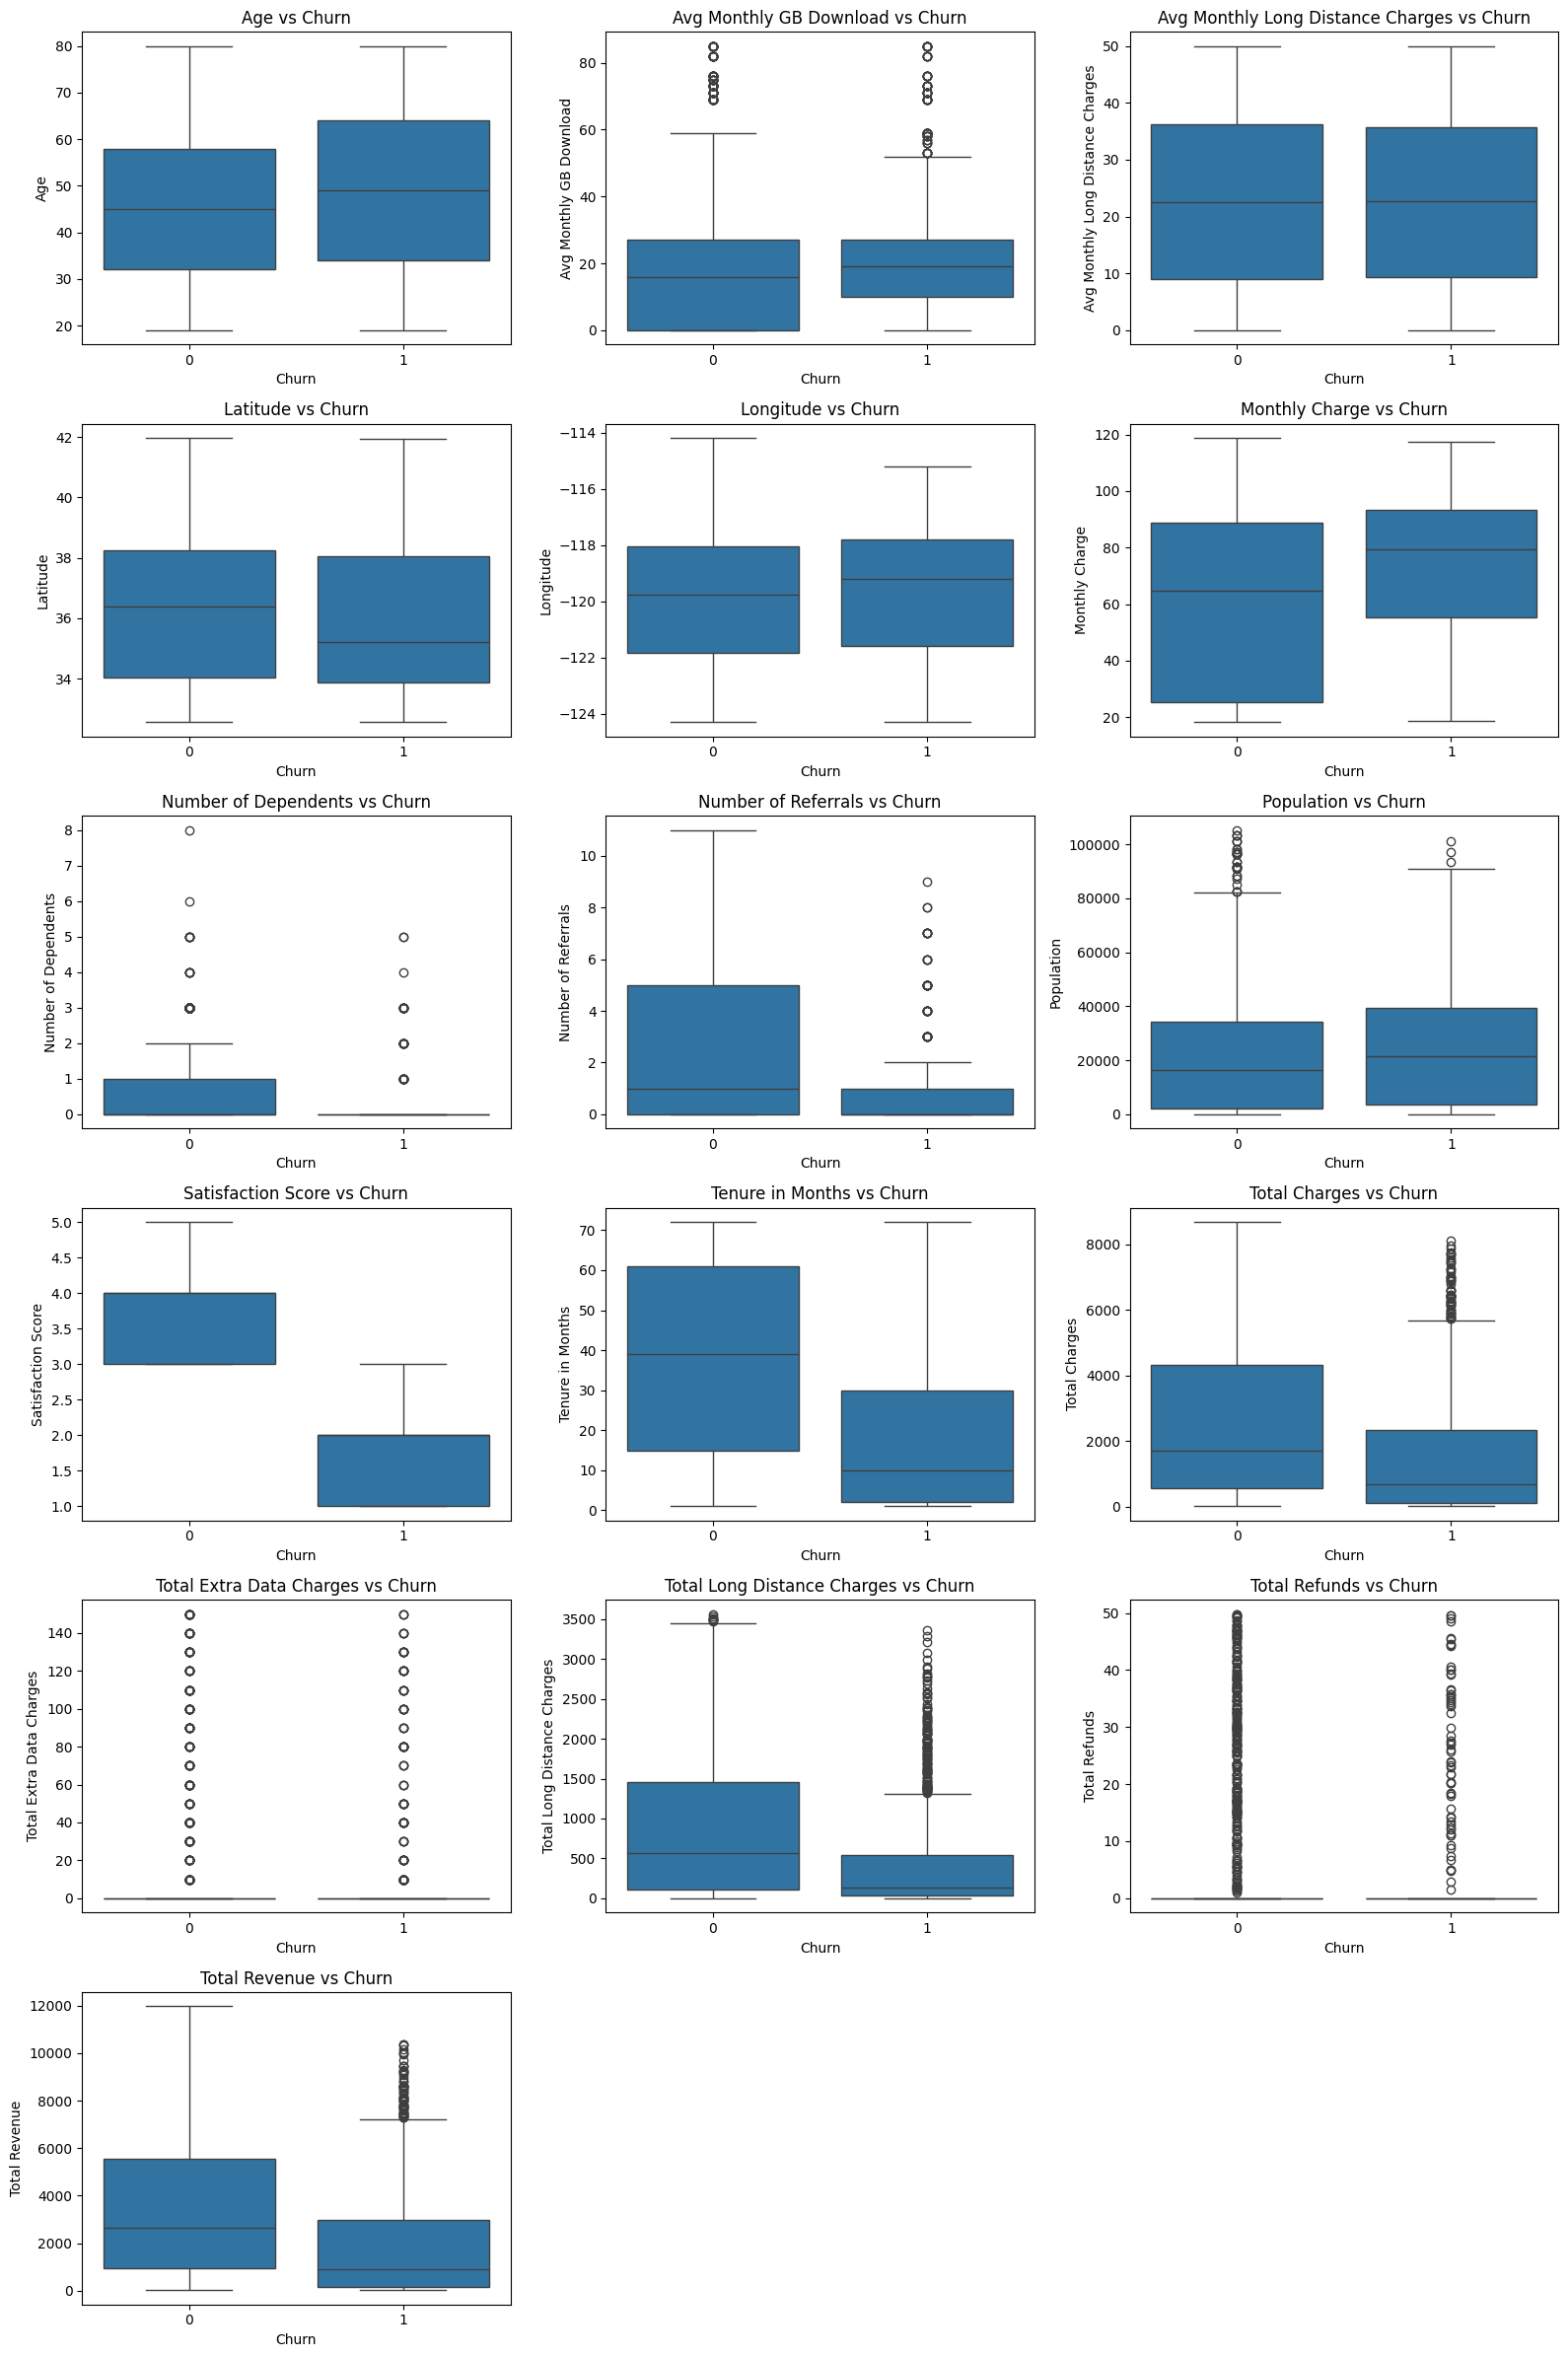

In [ ]:
n = len(cont_cols)
cols = 3
rows = math.ceil(n / cols)
plt.figure(figsize=(16, rows * 4))

for i, col in enumerate(cont_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x='Churn', y=col, data=CSV_file)
    plt.title(f"{col} vs Churn")
    plt.tight_layout()

plt.show()


In [ ]:
X= CSV_file.drop(columns=['Churn'])
y=CSV_file['Churn']




In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

In [ ]:
for col in col_column:
  le= LabelEncoder()
  X_train[col]= le.fit_transform(X_train[col])
  X_test[col] = le.transform(X_test[col])

In [ ]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(
    max_depth=6,
    learning_rate=0.1,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss'
)

model_xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred= model_xgb.predict(X_test)
y_pred_proba= model_xgb.predict_proba(X_test)[:,1]

print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Precision: ", precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("F1 Score: ", f1_score(y_test,y_pred))
print("ROC- AUC: ", roc_auc_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))

Accuracy:  0.9668639053254438
Precision:  0.9622641509433962
Recall:  0.9107142857142857
F1 Score:  0.9357798165137615
ROC- AUC:  0.9489159190246147
Confusion Matrix:  [[613   8]
 [ 20 204]]


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

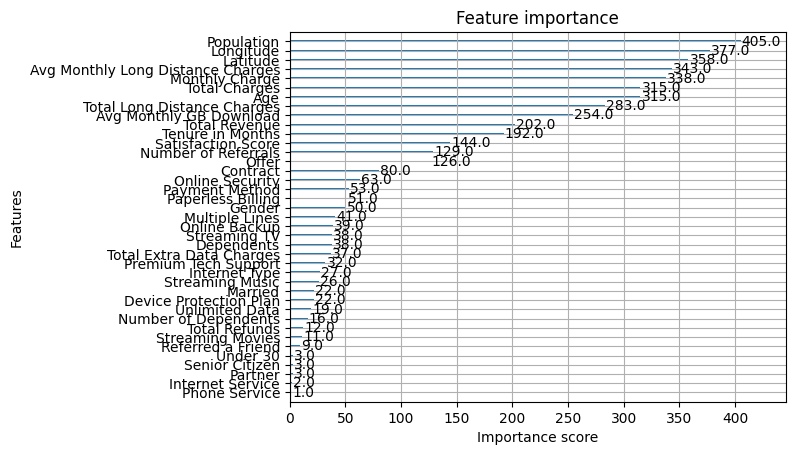

In [ ]:
xgb.plot_importance(model_xgb)


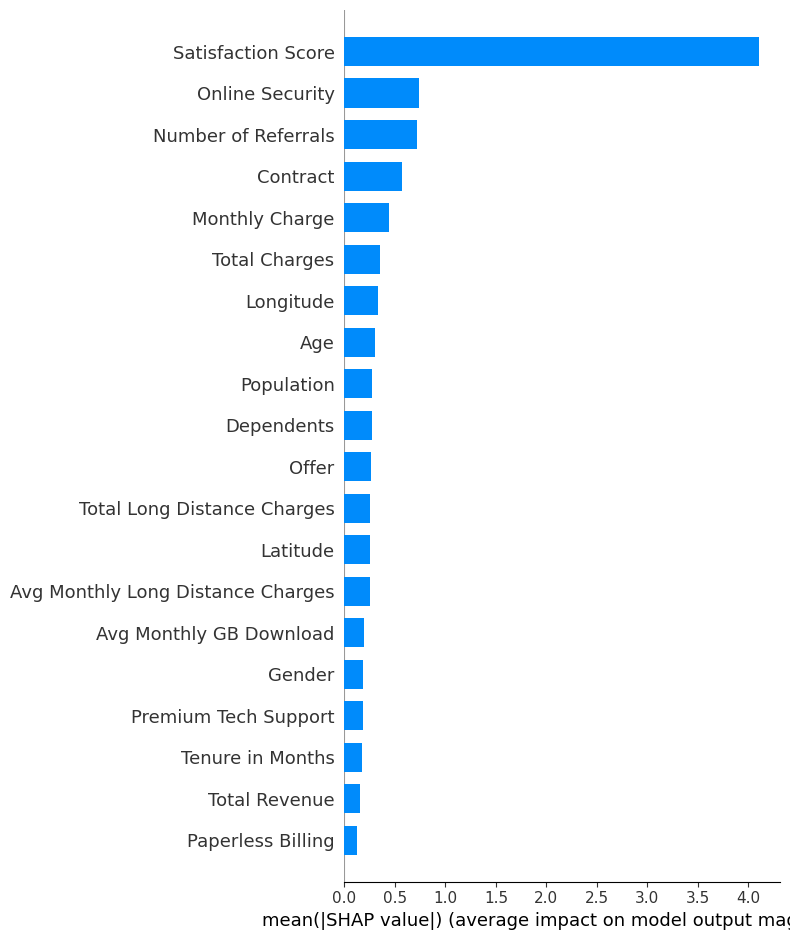

In [ ]:
shap.initjs()
explainer= shap.TreeExplainer(model_xgb)
shap_values= explainer.shap_values(X_test)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar")


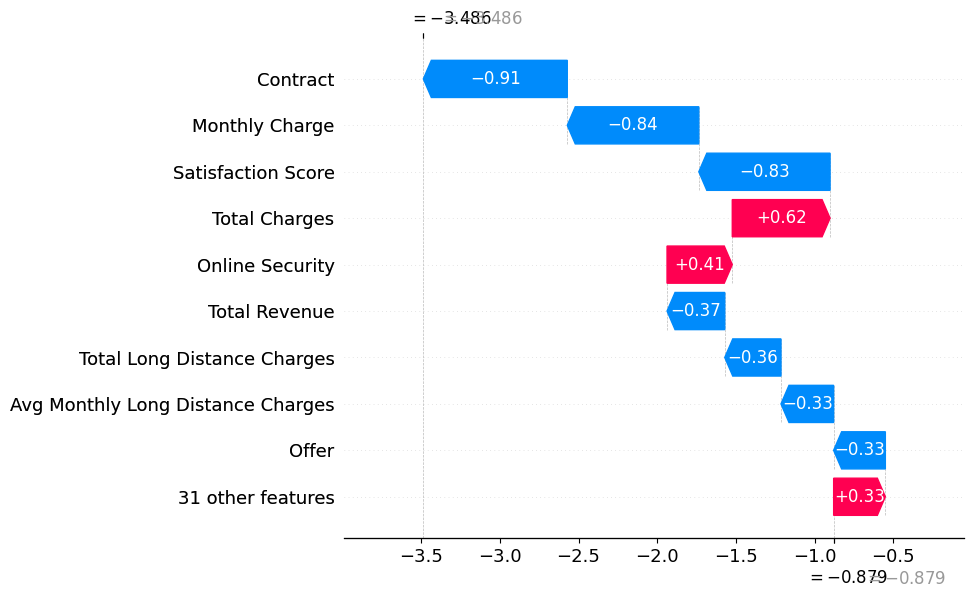

In [ ]:
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value,
    shap_values[i],
    feature_names=X_test.columns
)


Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best parameters found:
{'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.6}
Accuracy:  0.9727810650887574
Precision: 0.971830985915493
Recall:    0.9241071428571429
F1 Score:  0.9473684210526315
ROC-AUC:   0.9947305613066483

Confusion Matrix:
 [[615   6]
 [ 17 207]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       621
           1       0.97      0.92      0.95       224

    accuracy                           0.97       845
   macro avg       0.97      0.96      0.96       845
weighted avg       0.97      0.97      0.97       845



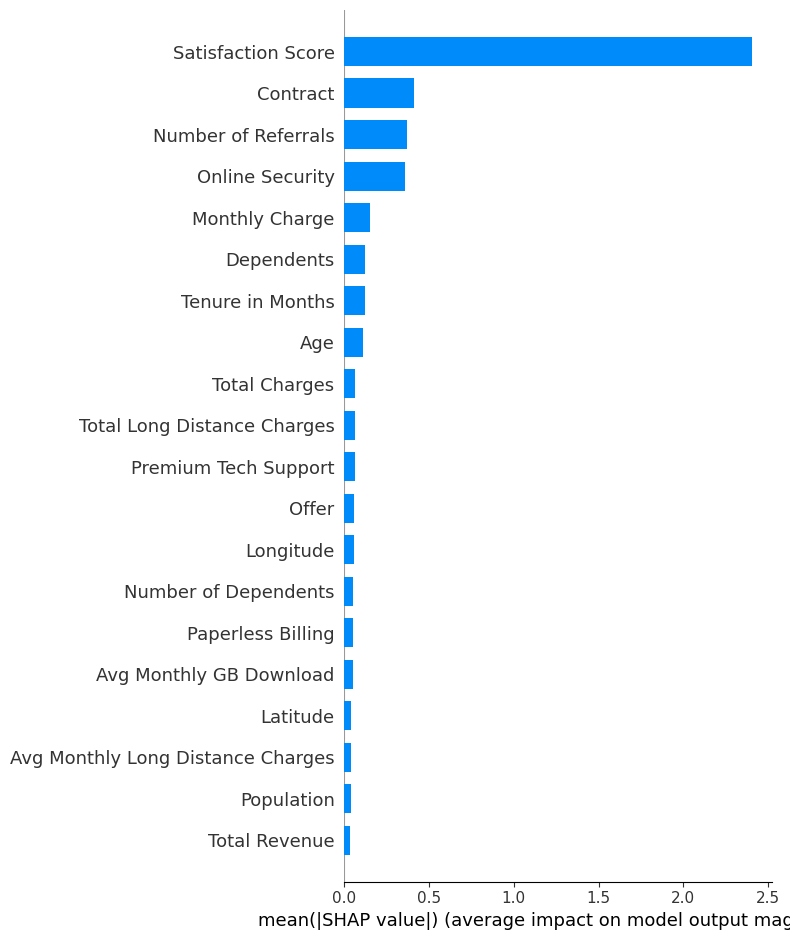

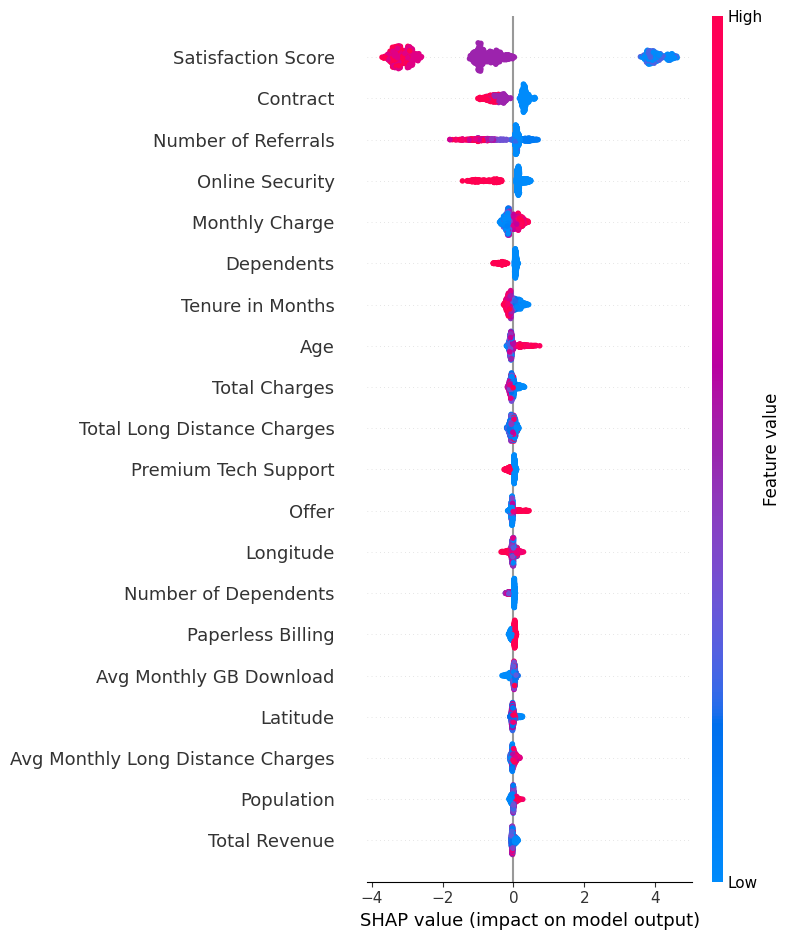

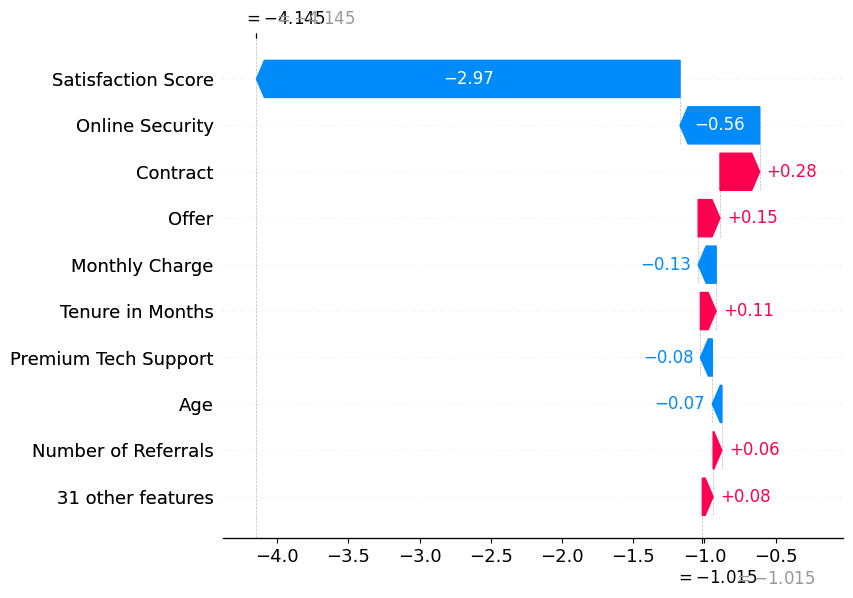

In [ ]:
from sklearn.model_selection import  RandomizedSearchCV



param_dist = {
    "n_estimators": [200, 300, 400, 500],
    "max_depth": [3, 4, 5, 6, 8],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 1, 5],
}

rand_search = RandomizedSearchCV(
    estimator=model_xgb,
    param_distributions=param_dist,
    n_iter=25,
    scoring="f1",
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

rand_search.fit(X_train, y_train)

print("Best parameters found:")
print(rand_search.best_params_)



best_xgb = rand_search.best_estimator_

best_xgb.fit(X_train, y_train)

y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: ", acc)
print("Precision:", prec)
print("Recall:   ", rec)
print("F1 Score: ", f1)
print("ROC-AUC:  ", roc)
print("\nConfusion Matrix:\n", cm)
print("\nClassification report:\n", classification_report(y_test, y_pred))
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test)

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, show=False)
plt.tight_layout()
plt.show()

shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value,
    shap_values[i],
    feature_names=X_test.columns
)

In [ ]:
test_csv_file= pd.read_csv('/content/test.csv')
test_csv_file.isnull().sum()


,0
Age,0
Avg Monthly GB Download,0
Avg Monthly Long Distance Charges,0
Churn Category,1035
Churn Reason,1035
Churn Score,0
City,0
CLTV,0
Contract,0
Country,0


In [ ]:
test_csv_file.drop(columns=['Churn Category','Churn Reason','Churn Score'],inplace= True)
drop_cols = ['Customer ID', 'City', 'Country', 'Lat Long', 'State', 'Zip Code','CLTV','Customer Status']
test_csv_file = test_csv_file.drop(columns=drop_cols)

In [ ]:
test_csv_file['Internet Type'].fillna('No Internet',inplace= True)
test_csv_file['Offer'].fillna('No Offer',inplace= True)

/tmp/ipython-input-2364179856.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_csv_file['Internet Type'].fillna('No Internet',inplace= True)
/tmp/ipython-input-2364179856.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [ ]:
test_csv_file.isnull().sum()

,0
Age,0
Avg Monthly GB Download,0
Avg Monthly Long Distance Charges,0
Contract,0
Dependents,0
Device Protection Plan,0
Gender,0
Internet Service,0
Internet Type,0
Latitude,0


In [ ]:
y_true = test_csv_file["Churn"].copy()

test_csv_file.drop(columns='Churn', inplace = True)


In [ ]:
num_column= test_csv_file.select_dtypes(include=['int64','float64'])
obj_column= test_csv_file.select_dtypes(include=['object'])


In [ ]:
for col in obj_column.columns:
    test_csv_file[col] = test_csv_file[col].astype("category")


In [ ]:
test_df = test_csv_file.copy()
X_new = test_df[X_train.columns]
y_pred_proba = best_xgb.predict_proba(X_new)[:, 1]
y_pred_test = (y_pred_proba > 0.5).astype(int)
test_df["Churn_Prob"] = y_pred_proba
test_df["Churn_Pred"] = y_pred_test
high_risk = test_df.sort_values("Churn_Prob", ascending=False).head(20)
print(high_risk[["Churn_Prob", "Churn_Pred"]])

test_df["Churn_Pred"].value_counts()


      Churn_Prob  Churn_Pred
794     0.991337           1
114     0.991103           1
894     0.990886           1
875     0.990652           1
1118    0.990413           1
1338    0.990332           1
1117    0.990327           1
365     0.990054           1
1197    0.990054           1
758     0.990040           1
101     0.989911           1
1150    0.989659           1
593     0.989643           1
713     0.989588           1
996     0.989259           1
29      0.989095           1
1164    0.989053           1
1146    0.988923           1
1314    0.988893           1
745     0.988873           1


,count
Churn_Pred,
0,1057
1,352


In [ ]:
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1:", f1_score(y_true, y_pred))
print("ROC-AUC:", roc_auc_score(y_true, y_pred_proba))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))

Accuracy: 0.6990773598296665
Precision: 0.46867167919799496
Recall: 1.0
F1: 0.6382252559726962
ROC-AUC: 0.9929783771215995

Confusion Matrix:
 [[611 424]
 [  0 374]]


In [ ]:
thresholds = np.linspace(0.1, 0.9, 17)

for t in thresholds:
    y_temp = (y_pred_proba > t).astype(int)
    print(f"Threshold: {t:.2f}, F1: {f1_score(y_true, y_temp):.4f}")



Threshold: 0.10, F1: 0.8638
Threshold: 0.15, F1: 0.8935
Threshold: 0.20, F1: 0.9190
Threshold: 0.25, F1: 0.9231
Threshold: 0.30, F1: 0.9231
Threshold: 0.35, F1: 0.9298
Threshold: 0.40, F1: 0.9317
Threshold: 0.45, F1: 0.9319
Threshold: 0.50, F1: 0.9311
Threshold: 0.55, F1: 0.9276
Threshold: 0.60, F1: 0.9224
Threshold: 0.65, F1: 0.9191
Threshold: 0.70, F1: 0.9112
Threshold: 0.75, F1: 0.9070
Threshold: 0.80, F1: 0.8971
Threshold: 0.85, F1: 0.8823
Threshold: 0.90, F1: 0.8786


In [ ]:
test_df = test_csv_file.copy()
X_new = test_df[X_train.columns]

y_pred_proba = best_xgb.predict_proba(X_new)[:, 1]
y_pred_test = (y_pred_proba > 0.45).astype(int)

test_df["Churn_Prob"] = y_pred_proba
test_df["Churn_Pred"] = y_pred_test

high_risk = test_df.sort_values("Churn_Prob", ascending=False).head(20)
print(high_risk[["Churn_Prob", "Churn_Pred"]])

print(test_df["Churn_Pred"].value_counts())

# Evaluate correctly with the new threshold
print("Accuracy:", accuracy_score(y_true, y_pred_test))
print("Precision:", precision_score(y_true, y_pred_test))
print("Recall:", recall_score(y_true, y_pred_test))
print("F1:", f1_score(y_true, y_pred_test))
print("ROC-AUC:", roc_auc_score(y_true, y_pred_proba))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred_test))


      Churn_Prob  Churn_Pred
794     0.991337           1
114     0.991103           1
894     0.990886           1
875     0.990652           1
1118    0.990413           1
1338    0.990332           1
1117    0.990327           1
365     0.990054           1
1197    0.990054           1
758     0.990040           1
101     0.989911           1
1150    0.989659           1
593     0.989643           1
713     0.989588           1
996     0.989259           1
29      0.989095           1
1164    0.989053           1
1146    0.988923           1
1314    0.988893           1
745     0.988873           1
Churn_Pred
0    1049
1     360
Name: count, dtype: int64
Accuracy: 0.964513839602555
Precision: 0.95
Recall: 0.9144385026737968
F1: 0.9318801089918256
ROC-AUC: 0.9929783771215995

Confusion Matrix:
 [[1017   18]
 [  32  342]]
